Decision Tree

Tiatnic Survival Dataset

In [1]:
#Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix)
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Load the data sets- train and test 
df=pd.read_csv('/home/vamshi/Downloads/train.csv')

In [3]:
#Look at top values of train data 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the column names of train data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#Print the dimension of train and test data
df.shape

(891, 12)

In [6]:
#Print the number of missing values in each column of train and test data

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualization

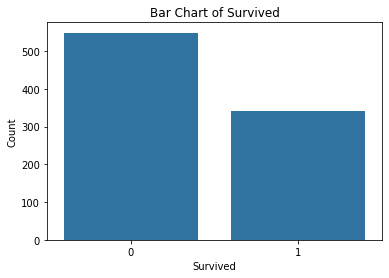

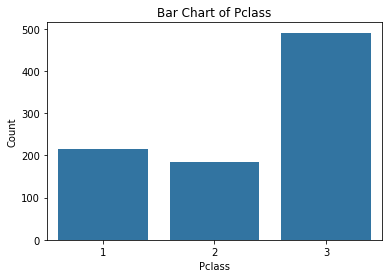

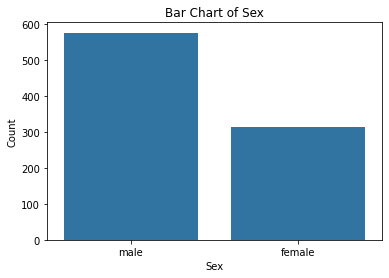

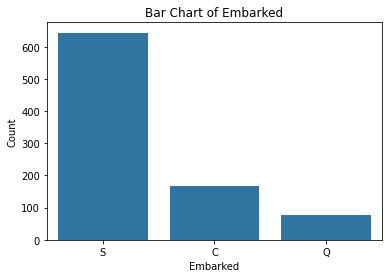

In [7]:
#Barchart of Survived, Pclass, Sex, Embarked
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for col in categorical_cols:
    if col in df.columns:
        sns.countplot(data=df, x=col)
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")

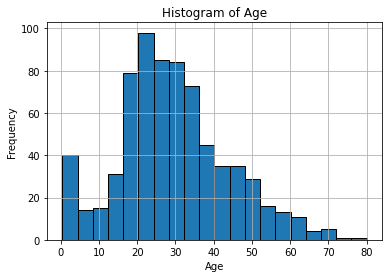

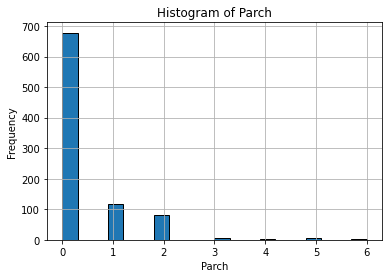

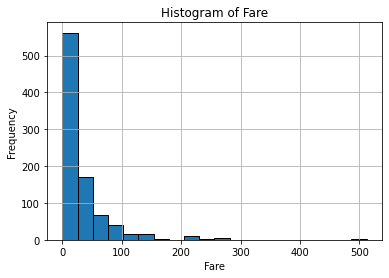

In [8]:
#Histogram of Age, Parch, Fare
numeric_cols = ['Age', 'Parch', 'Fare']

for col in numeric_cols:
    if col in df.columns:
        plt.hist(df[col].dropna(), bins=20, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
    else:
        print(f"Column '{col}' not found in dataset.")


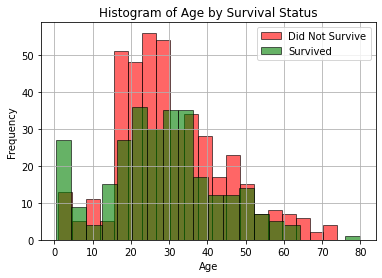

In [9]:
#Plot histogram of age for survived and did not survived class
if 'Survived' in df.columns and 'Age' in df.columns:
    # Plotting
    plt.hist(df[df['Survived'] == 0]['Age'].dropna(), bins=20, alpha=0.6, label='Did Not Survive', color='red', edgecolor='black')
    plt.hist(df[df['Survived'] == 1]['Age'].dropna(), bins=20, alpha=0.6, label='Survived', color='green', edgecolor='black')
    
    plt.title('Histogram of Age by Survival Status')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Columns 'Age' and/or 'Survived' not found in the dataset.")

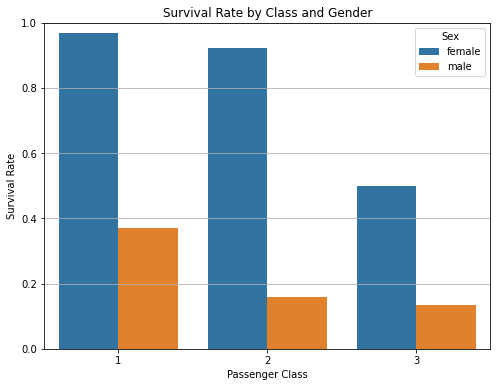

In [10]:
#Count class and geder wise survival rate - plot with appropriate chart
#Age wise Distribution of Male and Female passengers
if {'Survived', 'Pclass', 'Sex'}.issubset(df.columns):
    # Group by Pclass and Sex, then compute survival rate
    grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

    # Plot survival rate
    plt.figure(figsize=(8,6))
    sns.barplot(data=grouped, x='Pclass', y='Survived', hue='Sex')
    plt.title('Survival Rate by Class and Gender')
    plt.ylabel('Survival Rate')
    plt.xlabel('Passenger Class')
    plt.ylim(0, 1)
    plt.grid(True, axis='y')
    plt.show()
else:
    print("Columns 'Survived', 'Pclass', or 'Sex' not found in dataset.")

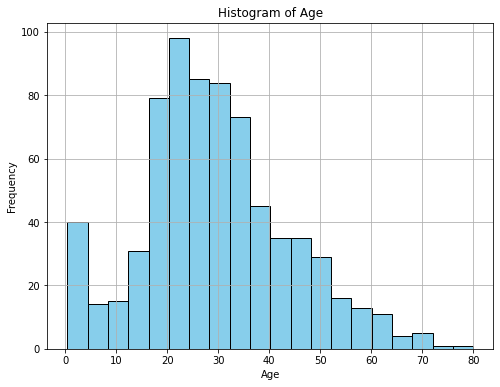

In [11]:
#Histogram of Age of the given data set(sample)
if 'Age' in df.columns:
    plt.figure(figsize=(8,6))
    plt.hist(df['Age'].dropna(), bins=20, edgecolor='black', color='skyblue')
    plt.title('Histogram of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("Column 'Age' not found in the dataset.")



## Handling Missing Values

In [12]:
#Replace the msiing values in Embarked column by 'S'
df['Embarked'] = df['Embarked'].fillna('S')

In [13]:
#Impute the missing values in Fare column with median value
df['Fare'] = df['Fare'].fillna(np.mean)

In [14]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
mean_age = df['Age'].mean(skipna=True)
std_age = df['Age'].std(skipna=True)
#that has same mean and standard deviation as non missing Age data

df['Age'] = df['Age'].apply(lambda x: np.random.normal(mean_age, std_age) if np.isnan(x) else x)

## Feature Engineering - Creating new features

In [15]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df['FamilySize'] = df['Parch']+df['SibSp']+1

In [16]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df['IsAlone'] = df['FamilySize'].apply(lambda x: True if x==1 else False)

## Create a new attribute Has_cabin using the attribue Cabin. 
#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [17]:
df['Has_cabin'] = df['Cabin'].apply(lambda x: False if x==np.nan else True)
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, PassengerId, Ticket, and Cabin
df.drop(['PassengerId', 'PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)


## Model Building

In [18]:
#Prepare X and y
#Prepare X and y
y = df['Survived']
X = df.drop(columns='Survived')

In [19]:
# Label encoding of categorical features
le = LabelEncoder()
cat_cols = X.select_dtypes(include=['object', 'bool']).columns

for col in cat_cols:
    X[col] = le.fit_transform(X[col])

In [20]:
# concat df_categorical with original df

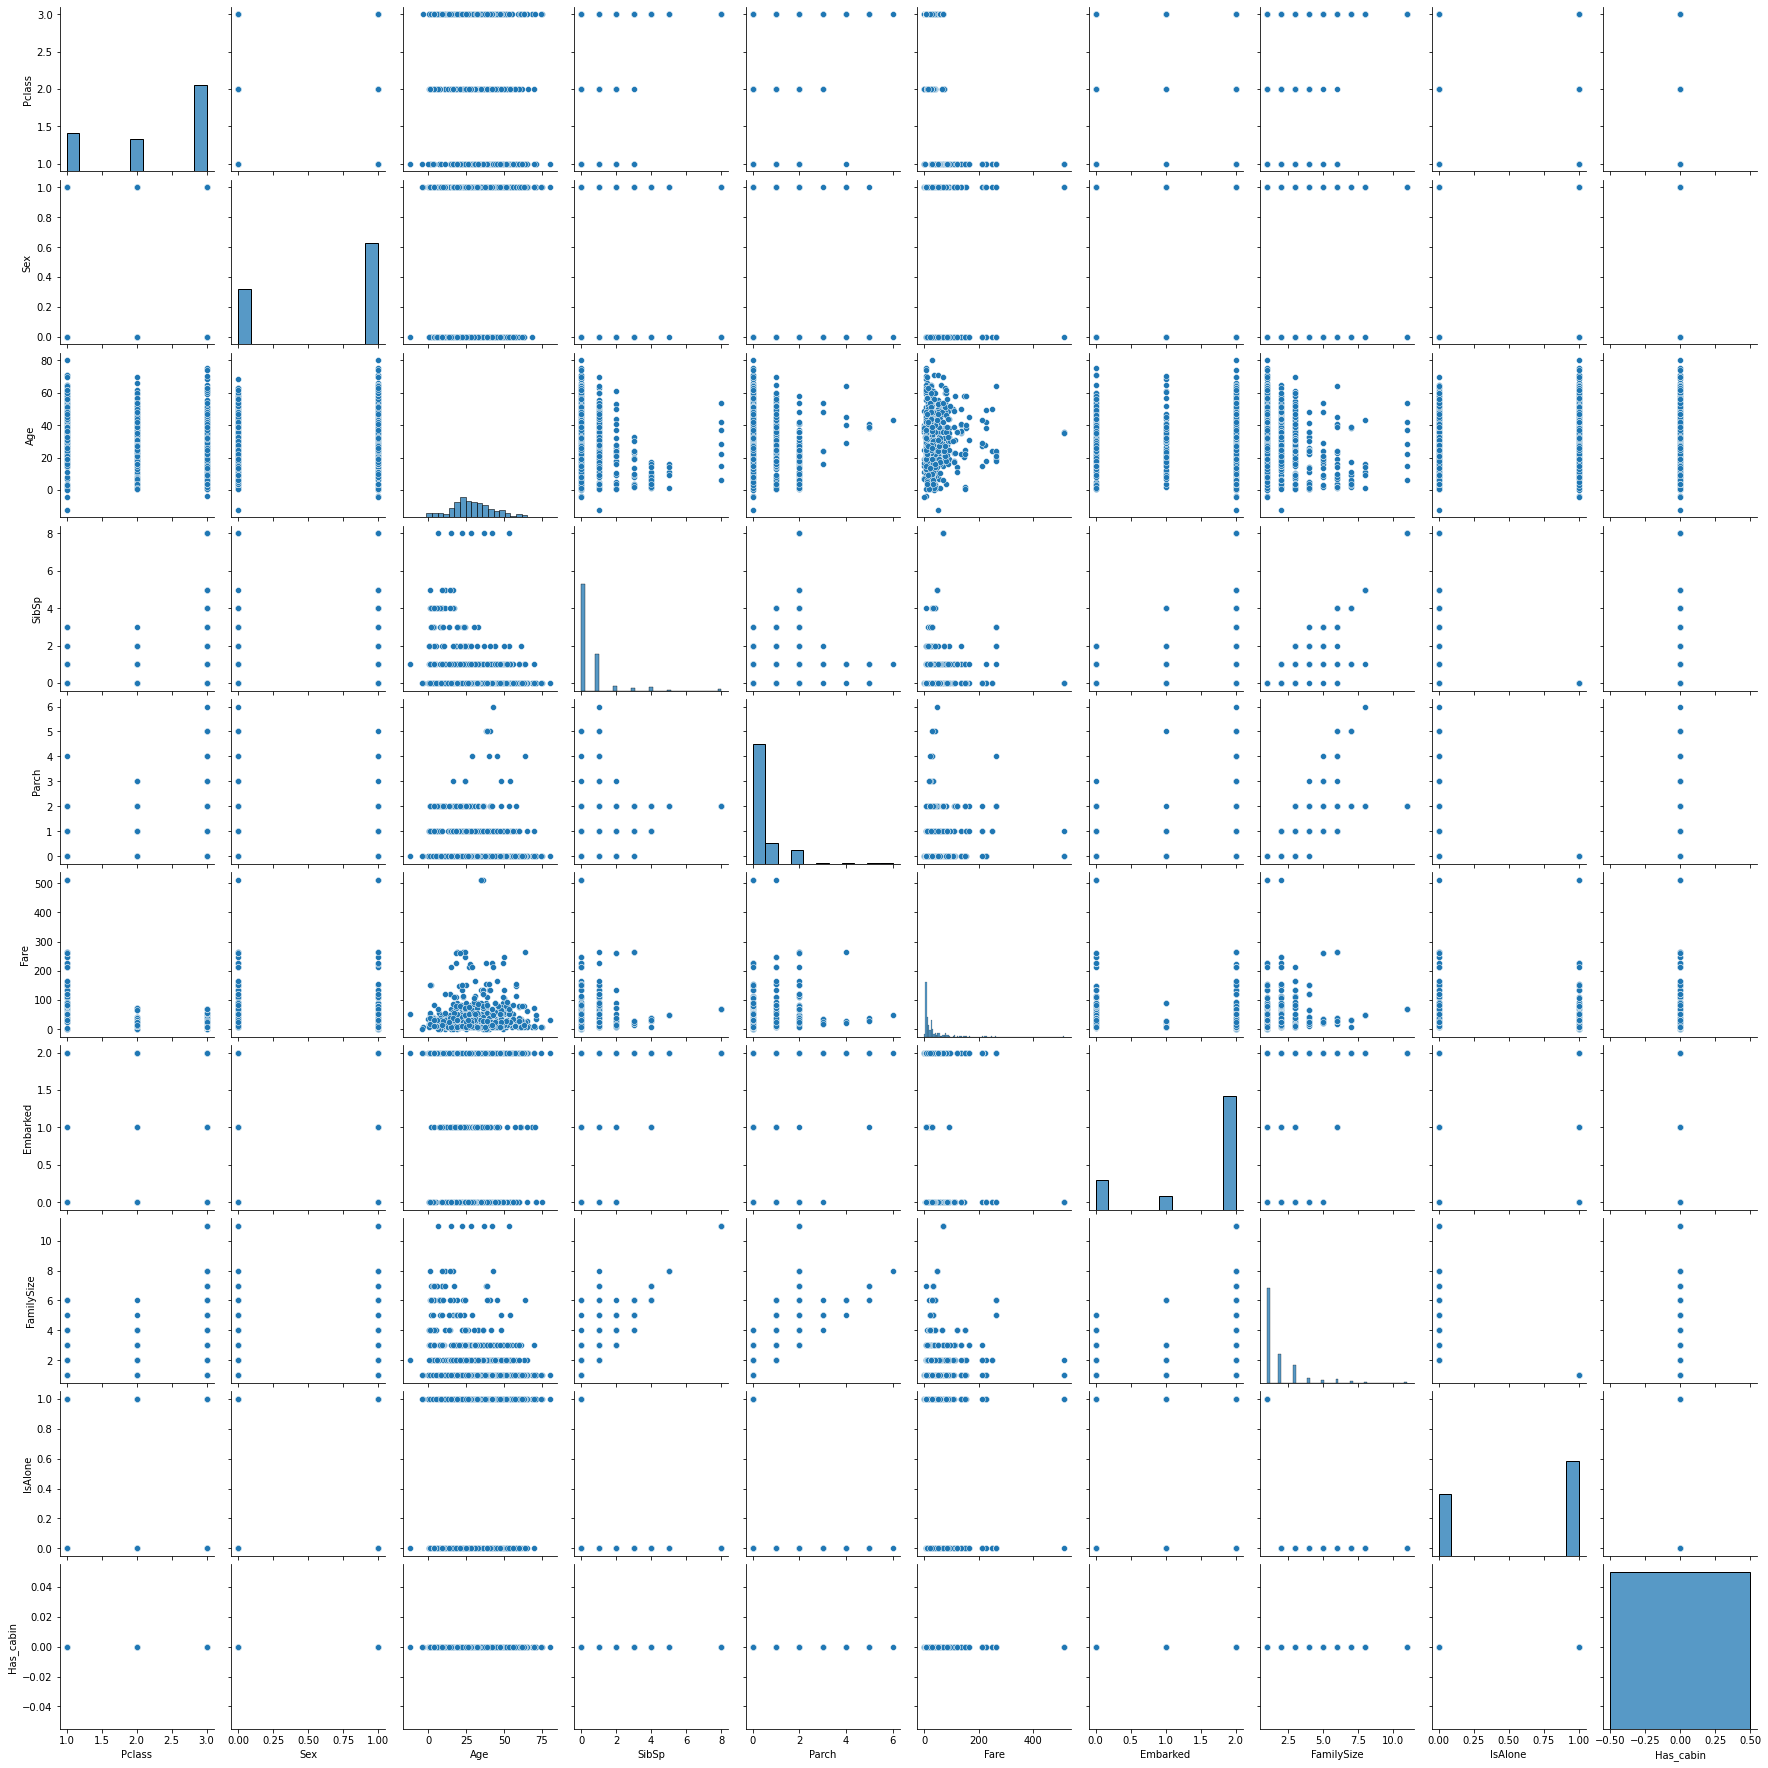

In [21]:
#Do a pairplot of all features
sns.pairplot(X)

In [22]:
#standardization

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
# Splitting the data into train and validation set - 90% train 10% validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=2, test_size=0.1, stratify=y)


In [24]:
# Create the model
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)
accuracy
# Fitting the knn with default hyperparameters
# Importing knn classifier from sklearn library

0.8222222222222222

In [25]:
best_k = 1
best_metric = 'euclidean'
best_accuracy = accuracy
for k in range(1, 20):
    for metric in ['euclidean', 'manhattan']:
        knn_model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_validation)
        accuracy = accuracy_score(y_validation, y_pred)
        if(accuracy>best_accuracy):
            best_accuracy = accuracy
            best_k = k
            best_metric = metric


In [26]:
print(f'best_k : {best_k}')
print(f'best_metric : {best_metric}')
print(f'best_accuracy : {best_accuracy}')

best_k : 2
best_metric : euclidean
best_accuracy : 0.8444444444444444


In [27]:
knn_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

<img src="tree2.png">

In [28]:
y_pred = knn_model.predict(X_validation)
accuracy = accuracy_score(y_validation, y_pred)
precision = precision_score(y_validation, y_pred, average='binary')
recall = recall_score(y_validation, y_pred, average='binary')
f1 = f1_score(y_validation, y_pred, average='binary')
conf_matrix = confusion_matrix(y_validation, y_pred)
accuracy = accuracy_score(y_validation, y_pred)

In [29]:
print(f'accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1 : {f1}')
print(f'conf_matrix:{conf_matrix}')

accuracy : 0.8444444444444444
precision : 0.8620689655172413
recall : 0.7142857142857143
f1 : 0.78125
conf_matrix:[[51  4]
 [10 25]]


In [30]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, X, y, cv=cv, scoring='accuracy')

In [31]:
np.mean(scores)


0.78

In [32]:
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Testing K values from 1 to 20
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Different distance metrics
}

grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print("Best K:", grid_search.best_params_['n_neighbors'])
print("Best Metric:", grid_search.best_params_['metric'])

Fitting 5 folds for each of 60 candidates, totalling 300 fits


Best K: 17
Best Metric: euclidean


In [33]:
grid_search.best_score_

0.8140062111801243

In [34]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [35]:
# Printing confusion matrix and accuracy

In [36]:
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import ConfusionMatrixDisplay, classification_report
# from sklearn.neighbors import KNeighborsClassifier
# df = pd.read_csv('/home/vamshi/Downloads/Week7_train.csv')
# mf = df.sample(frac=0.10)
# y = mf.iloc[:, 0]
# X = mf.iloc[:, 1:]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
# model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
# model.fit(X_train, y_train)
# y_pred = model.predict(X_train)
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# classification_report(y_test, y_pred)